<a href="https://colab.research.google.com/github/bskkarthik/DemoRepo/blob/master/MNIST_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classify Handwritten-Digits With Tensorflow

Description of the MNIST Handwritten Digit.
The MNIST Handwritten Digit is a dataset for evaluating machine learning and deep learning models on the handwritten digit classification problem, it is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


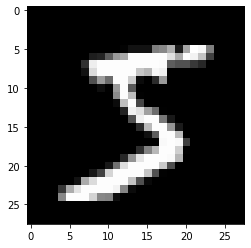

In [0]:
plt.imshow(x_train[0], cmap="gray")
plt.show()

Before we feed the data into the neural network we need to normalize it by scaling the pixels value in a range from 0 to 1 instead of being from 0 to 255 and that make the neural network needs less computational power:

In [0]:
x_train = tf.keras.utils.normalize(x_train)

In [0]:
x_test = tf.keras.utils.normalize(x_test)

In [0]:
#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Add a dropout 
model.add(tf.keras.layers.Dropout(0.2))
# Build the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [0]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [0]:
model.fit(x=x_train, y=y_train, epochs=5) # Start training proces

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3416 - accuracy: 0.9014
Epoch 2/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1614 - accuracy: 0.9518
Epoch 3/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1215 - accuracy: 0.9634
Epoch 4/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0994 - accuracy: 0.9695
Epoch 5/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0847 - accuracy: 0.9743


In [0]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=y_test)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
predictions = model.predict([x_test]) # Make prediction

In [0]:
import numpy as np
print(np.argmax(predictions[1000])) # Print out the number

9


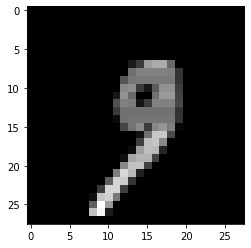

In [0]:
plt.imshow(x_test[1000], cmap="gray") # Import the image
plt.show() # Show the image